# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [1]:
from dotenv import load_dotenv
import os
import json
from pprint import pprint
load_dotenv()
API_KEY=os.getenv('weather_api_key')
#city="Houston"

In [6]:

units = 'imperial'
#url =  f'http://api.openweathermap.org/data/2.5/weather?appid={API_KEY}&units={units}&q='
#url =  f'http://api.openweathermap.org/data/2.5/weather?appid={API_KEY}&q='
url =  "http://api.openweathermap.org/data/2.5/weather?"
query_url =  f'http://api.openweathermap.org/data/2.5/weather?appid={API_KEY}&units={units}&q='


In [7]:
#get parameter locations
weather_response = requests.get(query_url+'Houston')
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 49},
 'cod': 200,
 'coord': {'lat': 29.7633, 'lon': -95.3633},
 'dt': 1630063902,
 'id': 4699066,
 'main': {'feels_like': 77.31,
          'humidity': 82,
          'pressure': 1012,
          'temp': 76.14,
          'temp_max': 78.4,
          'temp_min': 73.94},
 'name': 'Houston',
 'sys': {'country': 'US',
         'id': 2006306,
         'sunrise': 1630065377,
         'sunset': 1630111795,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 11, 'gust': 4, 'speed': 1.99}}


In [8]:
city_data=[]
city1=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
counter=1

for city in cities:
    print(f'Processing city number{counter}.{city}')
    counter=counter+1
    try:
        weather_response = requests.get(query_url+city)
        weather_json = weather_response.json()
        city_data.append(weather_json) 
        city1.append(weather_json['name']) 
        lat.append(weather_json['coord']['lat']) 
        lng.append(weather_json['coord']['lon']) 
        max_temp.append(weather_json['main']['temp_max']) 
        humidity.append(weather_json['main']['humidity']) 
        cloudiness.append(weather_json['clouds']['all']) 
        wind_speed.append(weather_json['wind']['speed']) 
        country.append(weather_json['sys']['country']) 
        date.append(weather_json['dt']) 
    except(KeyError,IndexError):
        print('City data not found.')
    pass
    #pprint(weather_json)

Processing city number1.arraial do cabo
Processing city number2.pevek
Processing city number3.poum
Processing city number4.tasiilaq
Processing city number5.palabuhanratu
City data not found.
Processing city number6.vila franca do campo
Processing city number7.punta arenas
Processing city number8.qaanaaq
Processing city number9.mataura
Processing city number10.grand gaube
Processing city number11.mahebourg
Processing city number12.faanui
Processing city number13.tuktoyaktuk
Processing city number14.samusu
City data not found.
Processing city number15.marcona
City data not found.
Processing city number16.ferrol
Processing city number17.yellowknife
Processing city number18.bluff
Processing city number19.cervo
Processing city number20.borlange
City data not found.
Processing city number21.taolanaro
City data not found.
Processing city number22.penugonda
Processing city number23.severo-kurilsk
Processing city number24.sorland
Processing city number25.llanes
Processing city number26.hambanto

Processing city number221.airai
Processing city number222.saint-pierre
Processing city number223.soni
Processing city number224.alindao
Processing city number225.gat
Processing city number226.shegaon
Processing city number227.huangcun
Processing city number228.aketi
Processing city number229.dingle
Processing city number230.zolotinka
City data not found.
Processing city number231.tias
Processing city number232.ahipara
Processing city number233.basoko
Processing city number234.kyshtovka
Processing city number235.urdzhar
City data not found.
Processing city number236.iskateley
Processing city number237.kapit
Processing city number238.areka
Processing city number239.la ronge
Processing city number240.skjervoy
Processing city number241.beyneu
Processing city number242.kerema
Processing city number243.daru
Processing city number244.lieksa
Processing city number245.aksehir
Processing city number246.zatoka
Processing city number247.yate
Processing city number248.san patricio
Processing city n

Processing city number446.challakere
Processing city number447.kieta
Processing city number448.zhongshu
Processing city number449.ostersund
Processing city number450.maniitsoq
Processing city number451.saint-joseph
Processing city number452.bandarbeyla
Processing city number453.panzhihua
Processing city number454.omboue
Processing city number455.mayumba
Processing city number456.shingu
Processing city number457.moron
Processing city number458.maloye kozino
City data not found.
Processing city number459.nayoro
Processing city number460.saquena
Processing city number461.chicama
Processing city number462.champerico
Processing city number463.ambilobe
Processing city number464.kalakamati
Processing city number465.martapura
Processing city number466.camargo
Processing city number467.richards bay
Processing city number468.gamba
Processing city number469.victor harbor
Processing city number470.dicabisagan
Processing city number471.skagen
Processing city number472.margate
Processing city number

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#convert JSON to dataframe
#city_data=[]
#city1=[]
#lat=[]
#lng=[]
#max_temp=[]
#humidity=[]
#cloudiness=[]
#wind_speed=[]
#country=[]
#date=[]
#frames=[city1,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date]
a={'city':city1,'lattitude':lat,'longitude':lng,'max_temp':max_temp,'humidity':humidity,'cloudiness':cloudiness,'wind_speed':wind_speed,'country':country,'date':date}

weatherdf=pd.DataFrame(a)
weatherdf.to_csv('weatherdf.csv')
weatherdf

,city,lattitude,longitude,max_temp,humidity,cloudiness,wind_speed,country,date
0,Arraial do Cabo,-22.9661,-42.0278,73.36,88,75,16.11,BR,1630064268
1,Pevek,69.7008,170.3133,38.52,75,100,8.90,RU,1630064269
2,Poum,-20.2333,164.0167,73.94,78,56,14.07,NC,1630064269
3,Tasiilaq,65.6145,-37.6368,50.16,97,100,9.64,GL,1630064269
4,Vila Franca do Campo,37.7167,-25.4333,70.21,86,94,11.12,PT,1630064270
...,...,...,...,...,...,...,...,...,...
571,Shīeli,44.1667,66.7500,97.79,11,27,9.78,KZ,1630064461
572,New Glasgow,45.5834,-62.6486,72.10,83,3,8.55,CA,1630064462
573,Phan Thiet,10.9333,108.1000,77.65,87,98,3.40,VN,1630064462
574,Nur-Sultan,51.1801,71.4460,85.95,23,0,11.18,KZ,1630064462


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weatherdf.describe()

,lattitude,longitude,max_temp,humidity,cloudiness,wind_speed,date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,21.385993,20.077895,69.465295,69.788194,57.282986,8.357865,1.630064e+09
std,33.216924,91.128707,15.645428,22.984916,38.526216,6.041565,7.944366e+01
min,-54.800000,-179.166700,31.660000,1.000000,0.000000,0.000000,1.630064e+09
25%,-5.037200,-58.627400,57.347500,58.000000,18.000000,3.727500,1.630064e+09
50%,25.320700,27.101550,72.280000,75.000000,73.000000,7.070000,1.630064e+09
75%,50.432225,101.884675,80.585000,87.000000,96.000000,11.380000,1.630064e+09
max,78.218600,179.316700,111.340000,100.000000,100.000000,31.410000,1.630064e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

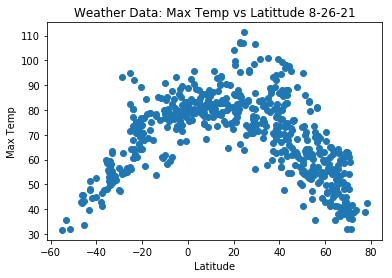

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# lattitude	longitude	max_temp	humidity	cloudiness	wind_speed	date
plt.scatter(weatherdf['lattitude'],weatherdf['max_temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title('Weather Data: Max Temp vs Latittude 8-26-21')
plt.show()

## Latitude vs. Humidity Plot

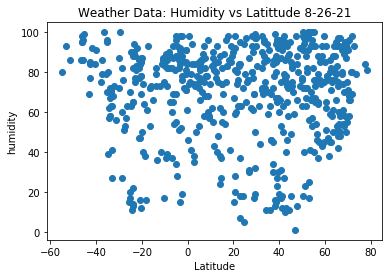

In [16]:
# lattitude	longitude	max_temp	humidity	cloudiness	wind_speed	date
plt.scatter(weatherdf['lattitude'],weatherdf['humidity'])
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.title('Weather Data: Humidity vs Latittude 8-26-21')
plt.show()

## Latitude vs. Cloudiness Plot

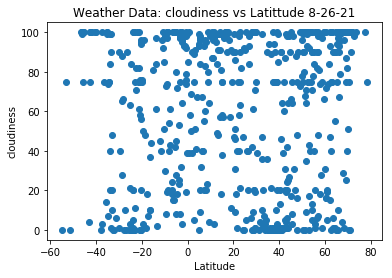

In [17]:
plt.scatter(weatherdf['lattitude'],weatherdf['cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.title('Weather Data: cloudiness vs Latittude 8-26-21')
plt.show()

## Latitude vs. Wind Speed Plot

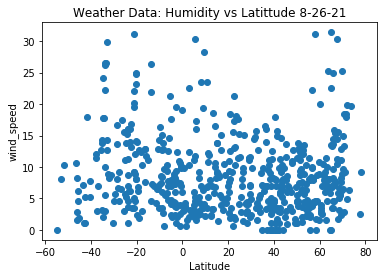

In [18]:
# lattitude	longitude	max_temp	humidity	cloudiness	wind_speed	date
plt.scatter(weatherdf['lattitude'],weatherdf['wind_speed'])
plt.xlabel("Latitude")
plt.ylabel("wind_speed")
plt.title('Weather Data: Humidity vs Latittude 8-26-21')
plt.show()

## Linear Regression

In [33]:
#north data
north_data = weatherdf[weatherdf['lattitude']>=0]



The r-squared is: -0.734784086872924


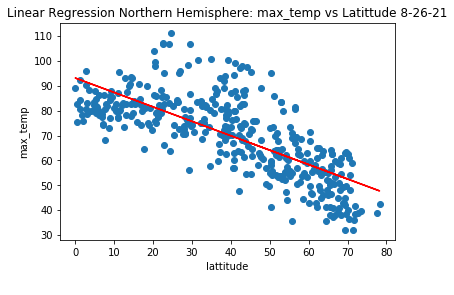

In [36]:
x_values = north_data['lattitude']
y_values = north_data['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lattitude')
plt.ylabel('max_temp')
plt.title('Linear Regression Northern Hemisphere: max_temp vs Latittude 8-26-21')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.734784086872924


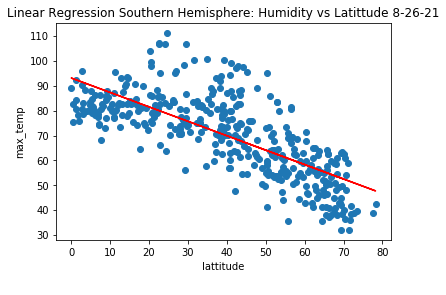

In [37]:
#south data
south_data = weatherdf[weatherdf['lattitude']>=0]
x_values = south_data['lattitude']
y_values = south_data['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lattitude')
plt.ylabel('max_temp')
plt.title('Linear Regression Southern Hemisphere: Humidity vs Latittude 8-26-21')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.05101676127277811


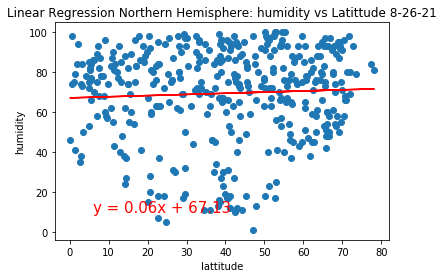

In [38]:
x_values = north_data['lattitude']
y_values = north_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lattitude')
plt.ylabel('humidity')
plt.title('Linear Regression Northern Hemisphere: humidity vs Latittude 8-26-21')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05101676127277811


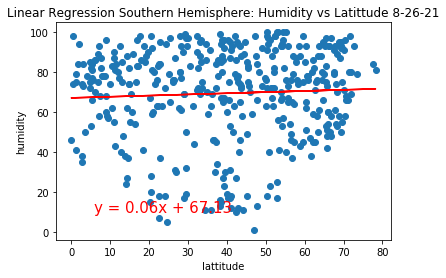

In [39]:
x_values = south_data['lattitude']
y_values = south_data['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lattitude')
plt.ylabel('humidity')
plt.title('Linear Regression Southern Hemisphere: Humidity vs Latittude 8-26-21')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05333122163252644


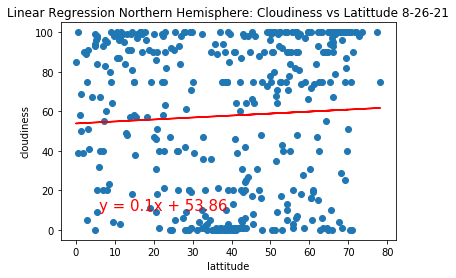

In [40]:
x_values = north_data['lattitude']
y_values = north_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lattitude')
plt.ylabel('cloudiness')
plt.title('Linear Regression Northern Hemisphere: Cloudiness vs Latittude 8-26-21')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05333122163252644


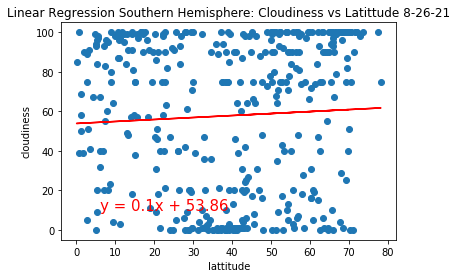

In [41]:
x_values = south_data['lattitude']
y_values = south_data['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lattitude')
plt.ylabel('cloudiness')
plt.title('Linear Regression Southern Hemisphere: Cloudiness vs Latittude 8-26-21')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06832136041655774


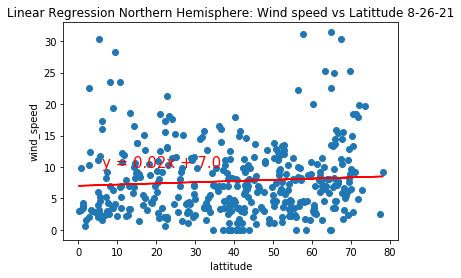

In [42]:
x_values = north_data['lattitude']
y_values = north_data['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lattitude')
plt.ylabel('wind_speed')
plt.title('Linear Regression Northern Hemisphere: Wind speed vs Latittude 8-26-21')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06832136041655774


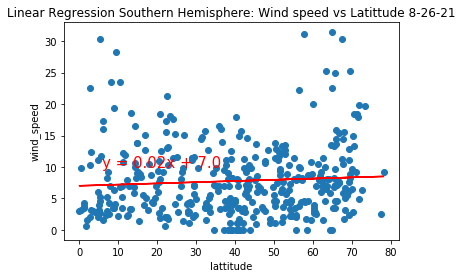

In [43]:
x_values = south_data['lattitude']
y_values = south_data['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lattitude')
plt.ylabel('wind_speed')
plt.title('Linear Regression Southern Hemisphere: Wind speed vs Latittude 8-26-21')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression